In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geoplot.crs as gcrs
import geoplot as gplt
%matplotlib inline

In [3]:
dfc= pd.read_csv('~/Assel_Badar-CAPSTONE2/DATA/calendar.csv.gz')
dfgn=pd.read_csv('~/Assel_Badar-CAPSTONE2/DATA/neighbourhoods.csv')
dfr=pd.read_csv('~/Assel_Badar-CAPSTONE2/DATA/reviews.csv.gz')
geo=pd.read_csv('~/Assel_Badar-CAPSTONE2/DATA/neighbourhoods.geojson')
dfl=pd.read_csv('~/Assel_Badar-CAPSTONE2/DATA/listings.csv.gz')

In [8]:
pd.set_option('display.max_columns',200)

In [17]:
# dt.to_csv('file_name.csv’) # relative position
# dfc.to_csv('~/Desktop/calendar.csv')
dfc

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3083,2020-06-17,t,$45.00,$45.00,3.0,30.0
1,1792134,2020-06-17,f,$75.00,$75.00,2.0,30.0
2,1792134,2020-06-18,f,$75.00,$75.00,2.0,30.0
3,1792134,2020-06-19,f,$75.00,$75.00,2.0,30.0
4,1792134,2020-06-20,f,$75.00,$75.00,2.0,30.0
...,...,...,...,...,...,...,...
1169545,43557224,2021-06-12,t,$400.00,$400.00,2.0,1125.0
1169546,43557224,2021-06-13,t,$320.00,$320.00,2.0,1125.0
1169547,43557224,2021-06-14,t,$320.00,$320.00,2.0,1125.0
1169548,43557224,2021-06-15,t,$320.00,$320.00,2.0,1125.0


In [50]:
# dfl.drop(columns=['host_name','listing_url'],inplace=True)
# dfl.drop(columns=['scrape_id','last_scraped','experiences_offered','thumbnail_url','picture_url','xl_picture_url','host_url','host_thumbnail_url','host_picture_url','host_url','host_has_profile_pic','calendar_last_scraped','first_review','last_review','requires_license','license','jurisdiction_names'],inplace=True)

In [48]:
dfl.info()
# dfl.drop(columns=['interaction','house_rules','medium_url','host_about','host_response_time','host_response_rate','host_verifications','host_identity_verified','smart_location','security_deposit','cleaning_fee','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','cancellation_policy','interaction','house_rules','medium_url','host_about','host_response_time','host_response_rate','host_verifications','host_identity_verified','smart_location','security_deposit','cleaning_fee','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','cancellation_policy'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3204 non-null   int64  
 1   name                                          3204 non-null   object 
 2   summary                                       3075 non-null   object 
 3   space                                         2423 non-null   object 
 4   description                                   3139 non-null   object 
 5   neighborhood_overview                         2304 non-null   object 
 6   notes                                         1610 non-null   object 
 7   transit                                       2316 non-null   object 
 8   access                                        1993 non-null   object 
 9   host_id                                       3204 non-null   i

Text(0, 0.5, 'Type of Room')

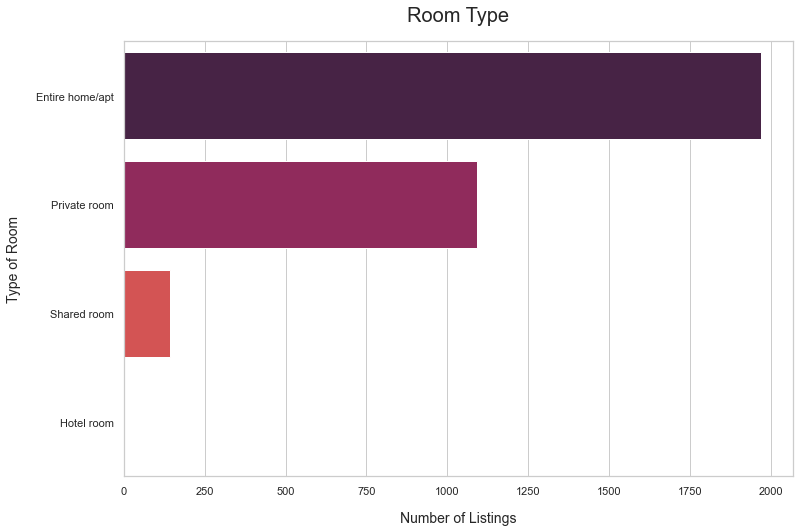

In [58]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.axes.set_title("Room Type",fontsize=20, pad=20)
ax = sns.countplot(y='room_type',data=dfl,order=dfl['room_type'].value_counts().index, palette="rocket")
ax.set_xlabel('Number of Listings',fontsize=14,labelpad=15)
ax.set_ylabel('Type of Room',fontsize=14,labelpad=15)
# ax.xaxis.set_tick_params(labelsize=10)
# ax.yaxis.set_tick_params(labelsize=10)

In [28]:
grouped = dfl.groupby('room_type')
grouped.groups

{'Entire home/apt': Int64Index([   1,    2,    5,    6,    7,    8,    9,   10,   13,   14,
             ...
             3189, 3191, 3192, 3193, 3195, 3196, 3200, 3201, 3202, 3203],
            dtype='int64', length=1969),
 'Hotel room': Int64Index([1616], dtype='int64'),
 'Private room': Int64Index([   0,    3,    4,   11,   12,   23,   25,   27,   41,   47,
             ...
             3168, 3169, 3172, 3174, 3175, 3179, 3185, 3190, 3194, 3197],
            dtype='int64', length=1090),
 'Shared room': Int64Index([ 117,  197,  328,  453,  483,  741,  898,  916, 1084, 1091,
             ...
             3052, 3053, 3054, 3057, 3058, 3062, 3091, 3098, 3198, 3199],
            dtype='int64', length=144)}

In [48]:
dfl.sort_values(by='price', ascending=True).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1592,21152974,"23 Min to SF, Blocks to BART, Private Room! (B4P)",14767694,Joe,NaN,Hoover-Foster,37.82263,-122.27603,Private room,0,1,122,2020-03-18,3.82,6,90
1469,19571162,Backyard Camping,3518,Traci,NaN,Prescott,37.80879,-122.29458,Private room,10,3,6,2018-08-11,0.18,8,45
1324,17793909,"Comfort Budget ""F"" Great Area 20 minutes to SF $1",35967118,Peggy,NaN,Grand Lake,37.81304,-122.24879,Shared room,15,1,39,2018-09-24,1.01,14,90
1502,19968907,"Comfort Budget ""G"" Great Neighborhood",35967118,Peggy,NaN,Grand Lake,37.81418,-122.24900,Shared room,15,1,34,2019-10-01,0.99,14,365
1308,17607684,"Comfort Budget ""E"" Great Neighborhood",35967118,Peggy,NaN,Grand Lake,37.81677,-122.24874,Shared room,19,1,35,2018-10-08,0.90,14,90
2758,38386300,Cabin Sleeping Room Private A+,30474731,Maestro.,NaN,Gaskill,37.83750,-122.27738,Private room,19,1,14,2020-04-06,1.65,4,352
1215,16556637,"Comfort Budget ""C"" Great Neighborhood",35967118,Peggy,NaN,Grand Lake,37.81416,-122.24785,Shared room,19,1,72,2020-01-05,1.75,14,90
1226,16599308,"Comfort Budget ""D"" Great Neighborhood",35967118,Peggy,NaN,Grand Lake,37.81287,-122.24882,Shared room,19,1,76,2020-05-06,1.86,14,90
1693,21923470,Charming Private Lakeside Flat,20094703,Nicole,NaN,Cleveland Heights,37.80141,-122.25014,Entire home/apt,20,2,5,2019-10-11,0.30,1,0
1510,20075153,"Comfort Budget ""H"" Great Neighborhood",35967118,Peggy,NaN,Grand Lake,37.81560,-122.24857,Shared room,20,14,42,2020-02-13,1.24,14,90


In [50]:
listings_geo=pd.DataFrame(dfl.groupby(['neighbourhood']).id.count()).reset_index()

In [51]:
price_geo=pd.DataFrame(dfl.groupby(['neighbourhood']).price.mean()).reset_index()

In [52]:
dfgn=dfgn.merge(listings_geo, on='neighbourhood')
dfgn=dfgn.merge(price_geo, on='neighbourhood')

In [53]:
dfgn.head(2)

,neighbourhood_group,neighbourhood,id,price
0,NaN,Acorn-Acorn Industrial,6,79.833333
1,NaN,Adams Point,75,116.613333


In [54]:
dfgn.drop(columns=['neighbourhood_group'],inplace=True)

In [1]:
dfc.head()

NameError: name 'dfc' is not defined

In [64]:
# gplt.choropleth(dfgn, hue=dfgn['id'], projection=gcrs.PlateCarree(),
#                 cmap='Blues', linewidth=0.5, edgecolor='white', k=None, legend=True, figsize=(10, 10))
# plt.title("Listings per Neighbourhood, Airbnb Sydney", fontsize=20, pad=60)
# plt.savefig("airbnb_listings_suburb.png", bbox_inches='tight', pad_inches=0.1)